# 1. Laboratorijske vježbe iz Numeričke matematike (zad2)

Ime i prezime: Ivan Futivić

Zadan je rubni problem 
$$-a u''(x)+u'(x)=0 \quad 0<x<1\quad a>0$$
$$u(0)=0,\quad u(1)=1$$

a) Ovaj problem ima analitičko rješenje koje je jednako
$$u(x)=\frac{e^{-\frac{1-x}{a}}-e^{-\frac{1}{a}}}{1-e^{-\frac{1}{a}}}$$
Koriteći biblioteku **matplotlib** nacrtajte ovo rješenje za dva volji odabrana $a.$ 

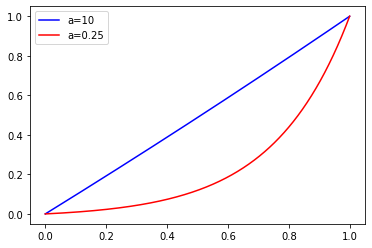

In [19]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1, 1000)

a = 10
y = (np.e ** (-(1 - x) / a) - np.e ** (-1 / a)) / (1 - np.e ** (-1 / a))
plt.plot(x, y, 'b', label='a={}'.format(a))

a = 0.25
y = (np.e ** (-(1 - x) / a) - np.e ** (-1 / a)) / (1 - np.e ** (-1 / a))
plt.plot(x, y, 'r', label='a={}'.format(a))

plt.legend(loc='upper left')

plt.show()

b) Koristeći centralne diferencije diskretizirajte rubni problem kao što smo to radili na predavanjima (u 4. predavanju -trodijagonalni sustavi te u 7. predavanju, drugi dio predavanja)
Ovdje u Markdown ćeliju zapišite koji sustav dobivate za ako uzmete uniformnu mrežu na [0,1], odnosno točke $$\{x_0=0,x_1,x_2,\ldots , x_n, x_{n+1}\},$$ gdje je $$x_i=x_0+ih, \ i=1,2,3,\ldots, n.$$
Sustav zapišite za $n=5$. (Pisanje matrica provjerite u nekom od *.ipynb s predavanja )

$$-a u''(x)+u'(x)=0$$

$$n=5\quad h=\frac{1}{n+1}=\frac{1}{6}$$

$$x=x_i\quad i=0,1,2,3,4,5,6\quad x+h=x_{i+1}\quad x-h=x_{i-1} \quad x_0 = 0 \quad x_6 = 1$$

$$u'(x_i)\approx\frac{u_{i+1}-u_{i-1}}{2h}$$

$$u''(x_i)\approx\frac{u_{i+1}-2u_i+u_{i-1}}{h^2}$$

$$u'(x_i)=au''(x_i)$$

$$(h-2a)u_{i+1} + 4au_i - (h+2a)u_{i-1}=0$$

$$u_0 = 0\quad u_6=1$$

<br>

$$
\begin{align}
(h-2a)u_2 + 4au_1 = 0 \quad i_1 \newline
(h-2a)u_3 + 4au_2 - (h+2a)u_1 = 0 \quad i_2 \newline
(h-2a)u_4 + 4au_3 - (h+2a)u_2 = 0 \quad i_3 \newline
(h-2a)u_5 + 4au_4 - (h+2a)u_3 = 0 \quad i_4 \newline
4au_5 - (h+2a)u_4 = -(h-2a) \quad i_5 
\end{align}
$$

<br>

$$
\begin{bmatrix} 
4a& (h-2a)& 0& 0& 0 \\
-(h+2a)& 4a& (h-2a)& 0& 0 \\
0& -(h+2a)& 4a& (h-2a)& 0 \\
0& 0& -(h+2a)& 4a& (h-2a) \\
0& 0& 0& -(h+2a)& 4a
\end{bmatrix}
\begin{bmatrix} 
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5
\end{bmatrix}
=
\begin{bmatrix} 
0 \\
0 \\
0 \\
0 \\
-(h-2a)
\end{bmatrix}
$$

c) Neka je sada $a=2$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def LU_decompostion_tridiagonal(diagonal_a, diagonal_b, diagonal_c):
    n = len(diagonal_b)

    for k in range(1, n):
        mu = diagonal_a[k - 1] / diagonal_b[k - 1]
        diagonal_b[k] = diagonal_b[k] - mu * diagonal_c[k - 1]
        diagonal_a[k - 1] = mu

    return diagonal_a, diagonal_b, diagonal_c

def LU_solve_tridiagonal(diagonal_a, diagonal_b, diagonal_c, f):
    n = len(diagonal_b)

    for k in range(1, n):
        f[k] = f[k] - diagonal_a[k - 1] * f[k - 1]

    f[n - 1] = f[n - 1] / diagonal_b[n - 1]

    for k in range(n - 2, -1, -1):
        f[k] = (f[k] - diagonal_c[k] * f[k + 1]) / diagonal_b[k]

    return f

def set_diagonals_and_f(x, a, alpha, beta):
    n = len(x) - 2
    h = 1.0 / (n + 1)

    f = np.zeros((n - 1))
    f = np.append(f, [(-(h - 2 * a))])

    diagonal_a = np.ones((n - 1)) * (-(h + 2 * a))
    
    diagonal_b = np.ones((n)) * (4 * a)

    diagonal_c = np.ones((n - 1)) * (h - 2 * a)

    return diagonal_a, diagonal_b, diagonal_c, f


def exact_solution(x, a):
    return (np.e ** (-(1 - x) / a) - np.e ** (-1 / a)) / (1 - np.e ** (-1 / a))

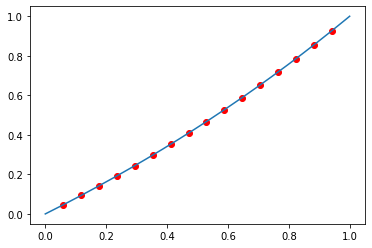

In [18]:
a = 2
n = 16

x = np.linspace(0, 1, n + 2)

diagonal_a, diagonal_b, diagonal_c, f = set_diagonals_and_f(x, a, 0, 1)
diagonal_a, diagonal_b, diagonal_c = LU_decompostion_tridiagonal(diagonal_a, diagonal_b, diagonal_c)

y = LU_solve_tridiagonal(diagonal_a, diagonal_b, diagonal_c, f)

plt.plot(x[1:n + 1], y, "ro")


x = np.linspace(0, 1, 1000)
y = exact_solution(x, a)

plt.plot(x, y)

plt.show()

d) Neka je sada $a=0.01$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju 

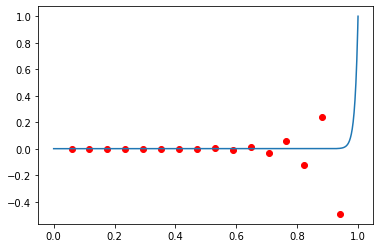

In [17]:
a = 0.01
n = 16

x = np.linspace(0, 1, n + 2)

diagonal_a, diagonal_b, diagonal_c, f = set_diagonals_and_f(x, a, 0, 1)
diagonal_a, diagonal_b, diagonal_c = LU_decompostion_tridiagonal(diagonal_a, diagonal_b, diagonal_c)

y = LU_solve_tridiagonal(diagonal_a, diagonal_b, diagonal_c, f)

plt.plot(x[1:n + 1], y, "ro")


x = np.linspace(0, 1, 1000)
y = exact_solution(x, a)

plt.plot(x, y)


plt.show()

e)  Sve isto kao po c) i d) za $n=100$

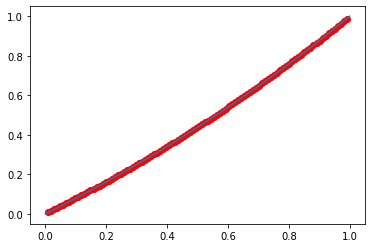

In [15]:
a = 2
n = 100

x = np.linspace(0, 1, n + 2)

diagonal_a, diagonal_b, diagonal_c, f = set_diagonals_and_f(x, a, 0, 1)
diagonal_a, diagonal_b, diagonal_c = LU_decompostion_tridiagonal(diagonal_a, diagonal_b, diagonal_c)

y = LU_solve_tridiagonal(diagonal_a, diagonal_b, diagonal_c, f)

plt.plot(x[1:n + 1], y, "ro")


x = np.linspace(0, 1, 1000)
y = exact_solution(x, a)

plt.plot(x, y)


plt.show()

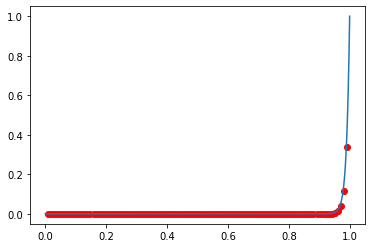

In [16]:
a = 0.01
n = 100

x = np.linspace(0, 1, n + 2)

diagonal_a, diagonal_b, diagonal_c, f = set_diagonals_and_f(x, a, 0, 1)
diagonal_a, diagonal_b, diagonal_c = LU_decompostion_tridiagonal(diagonal_a, diagonal_b, diagonal_c)

y = LU_solve_tridiagonal(diagonal_a, diagonal_b, diagonal_c, f)

plt.plot(x[1:n + 1], y, "ro")


x = np.linspace(0, 1, 1000)
y = exact_solution(x, a)

plt.plot(x, y)


plt.show()